In [1]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

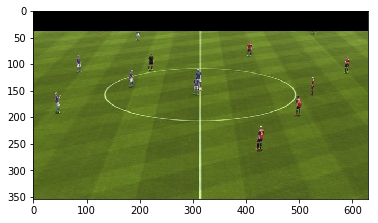

In [2]:
img = cv2.imread('images/fifa-2019-LineDetected.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_green = np.array([30, 40, 40])
upper_green = np.array([70, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

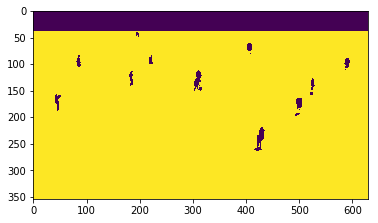

In [4]:
plt.imshow(mask)

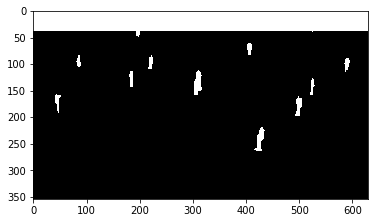

In [5]:
res = cv2.bitwise_and(img, img, mask=mask)
res_bgr = cv2.cvtColor(res, cv2.COLOR_HSV2BGR)
res_gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

kernel = np.ones((13, 13), np.uint8)
thresh = cv2.threshold(res_gray, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

plt.imshow(thresh, cmap='gray')

In [6]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
prev = 0
font = cv2.FONT_HERSHEY_SIMPLEX

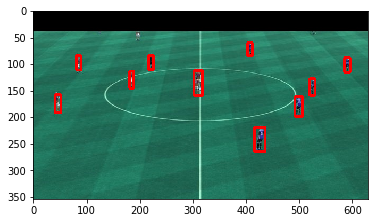

In [7]:
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    if h >= (1.2) * w:
        if w > 5 and h >= 5:
            player_img = img[y : y + h, x : x + w]
            player_hsv = cv2.cvtColor(player_img, cv2.COLOR_BGR2HSV)
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
plt.imshow(img)